# Complaint Status Tracking - Brainwave 2019
## Hosted on Hackerearth

Author : <strong> Vishal Soni </strong>
Team : <strong> icoders </strong>

### Importing Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a déposé un faux rapport auprès d..."
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requête en faillite n ° XXXX...
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel..."
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea..."
4,Tr-5,9/29/2016,Credit card,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crédit de soins pour ...


In [4]:
test.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary
0,Te-1,8/18/2016,Bank account or service,"Account opening, closing, or management",Company has responded to the consumer and the ...,8/18/2016,No,XXXX / XXXX / 16 I called Citibank to open a c...
1,Te-2,4/18/2016,Debt collection,Communication tactics,Company believes it acted appropriately as aut...,4/20/2016,No,I'm struggling financially. I called and I off...
2,Te-3,3/23/2016,Credit reporting,Incorrect information on credit report,NaN,3/23/2016,No,"In XXXX of 2015, an automatic payment was conf..."
3,Te-4,6/26/2017,Student loan,Dealing with your lender or servicer,NaN,6/26/2017,NaN,"I submitted a request to XXXX, which is my cur..."
4,Te-5,5/13/2016,Credit reporting,Incorrect information on credit report,Company has responded to the consumer and the ...,5/13/2016,No,A state tax lien was filed against me XXXX / X...


In [5]:
print(train.shape, test.shape)

(43266, 9) (18543, 8)


### Checking for Missing Values

In [6]:
train.isnull().sum()

Complaint-ID                      0
Date-received                     0
Transaction-Type                  0
Complaint-reason                  0
Company-response              22506
Date-sent-to-company              0
Complaint-Status                  0
Consumer-disputes              7698
Consumer-complaint-summary        0
dtype: int64

In [7]:
test.isnull().sum()

Complaint-ID                     0
Date-received                    0
Transaction-Type                 0
Complaint-reason                 0
Company-response              9701
Date-sent-to-company             0
Consumer-disputes             3304
Consumer-complaint-summary       0
dtype: int64

### Imputing Missing Values

In [8]:
train['Company-response'].replace(np.nan, 'Not provided', inplace = True)
test['Company-response'].replace(np.nan, 'Not provided', inplace = True)

In [9]:
train['Consumer-disputes'].replace(np.nan, 'YESNO', inplace = True)
test['Consumer-disputes'].replace(np.nan, 'YESNo', inplace = True)

### Feature Generation

#### Added Difference between Dates as new feature

In [10]:
train['Date-sent-to-company'] = pd.to_datetime(train['Date-sent-to-company'])
train['Date-received'] = pd.to_datetime(train['Date-received'])
train['diff'] = (train['Date-received'] - train['Date-sent-to-company']).dt.days

In [11]:
test['Date-sent-to-company'] = pd.to_datetime(test['Date-sent-to-company'])
test['Date-received'] = pd.to_datetime(test['Date-received'])
test['diff'] = (test['Date-received'] - test['Date-sent-to-company']).dt.days

In [12]:
print(len(np.unique(test['diff'])),len(np.unique(train['diff'])))

108 146


(43266, 10) (18543, 9)


### Data Processing and EDA

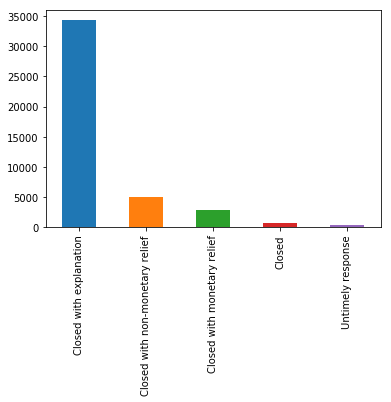

In [13]:
train['Complaint-Status'].value_counts().plot.bar()

<p> Imbalanced Classes!! </p>

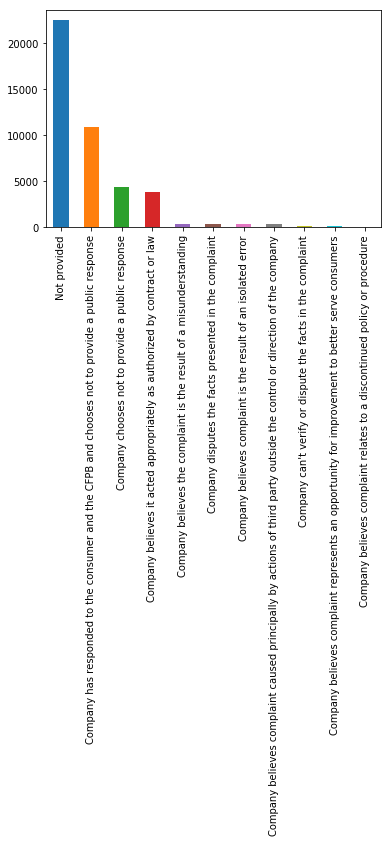

In [16]:
train['Company-response'].value_counts().plot.bar()

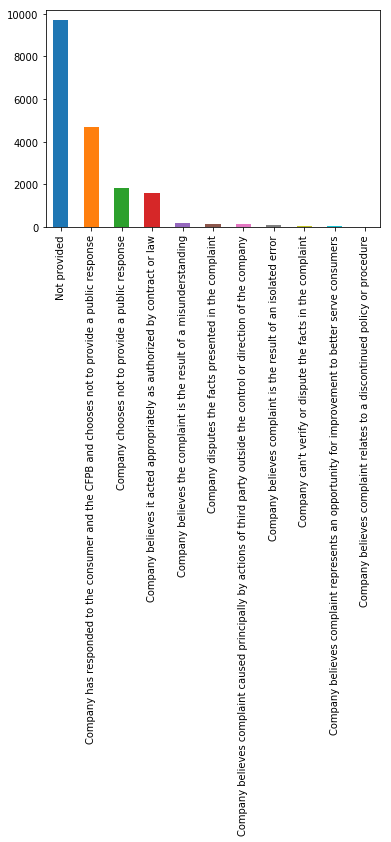

In [17]:
test['Company-response'].value_counts().plot.bar()

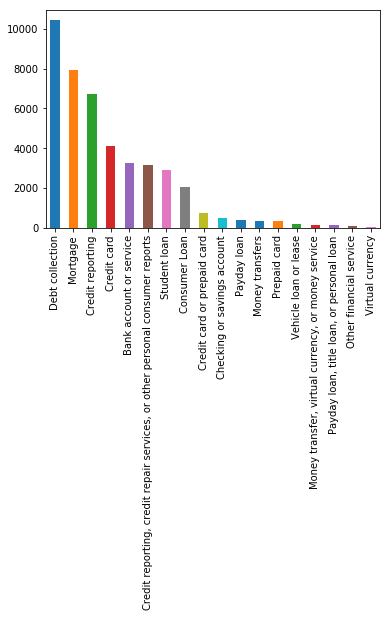

In [18]:
train['Transaction-Type'].value_counts().plot.bar()

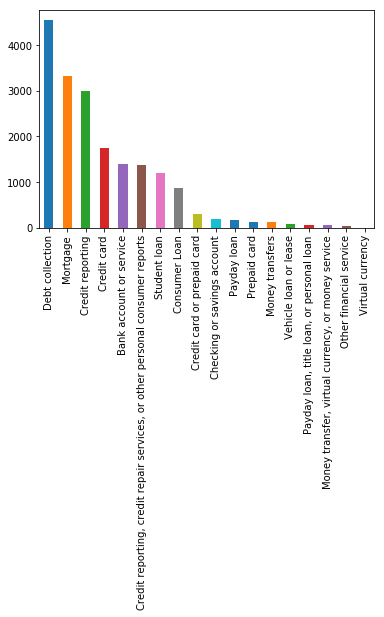

In [19]:
test['Transaction-Type'].value_counts().plot.bar()

<p> Dropping 'Complaint-ID', 'Date-received', 'Date-sent-to-company', 'Consumer-complaint-summary'</p>

In [21]:
train.drop(['Complaint-ID', 'Date-received', 'Date-sent-to-company', 'Consumer-complaint-summary'], axis = 1, inplace = True)
test.drop(['Complaint-ID', 'Date-received', 'Date-sent-to-company', 'Consumer-complaint-summary'], axis = 1, inplace = True)

### Resampling Major Class to Handle Imbalanced class problem

In [24]:
from sklearn.utils import resample
tr1 = train[train['Complaint-Status'] == 'Closed with explanation']
tr2 = train[train['Complaint-Status'] != 'Closed with explanation']
tr1 = resample(tr1, replace = False, n_samples = 15000, random_state = 25)
train = pd.concat([tr1, tr2])

In [25]:
train.shape

(23966, 6)

### Lable Encodering Categorical Variables

<p> Also tried One Hot Encoding but Label Encoder gave better result </p>

In [26]:
cat = ['Complaint-reason','Transaction-Type', 'Company-response', 'Consumer-disputes']

In [27]:
from sklearn.preprocessing import LabelEncoder
for i in cat:
    lb = LabelEncoder()
    train[i] = lb.fit_transform(train[i])
    test[i] = lb.fit_transform(test[i])

In [28]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train['response'] = lb.fit_transform(train['Complaint-Status'])

In [29]:
y = train['response']

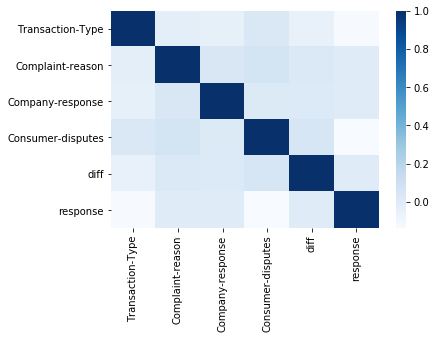

In [35]:
sns.heatmap(train.corr(), cmap = 'Blues')

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23966 entries, 18629 to 43251
Data columns (total 7 columns):
Transaction-Type     23966 non-null int32
Complaint-reason     23966 non-null int32
Company-response     23966 non-null int32
Complaint-Status     23966 non-null object
Consumer-disputes    23966 non-null int32
diff                 23966 non-null int64
response             23966 non-null int32
dtypes: int32(5), int64(1), object(1)
memory usage: 1.0+ MB


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18543 entries, 0 to 18542
Data columns (total 5 columns):
Transaction-Type     18543 non-null int32
Complaint-reason     18543 non-null int32
Company-response     18543 non-null int32
Consumer-disputes    18543 non-null int32
diff                 18543 non-null int64
dtypes: int32(4), int64(1)
memory usage: 434.7 KB


In [38]:
train.drop(['response', 'Complaint-Status'], axis = 1, inplace = True)

In [44]:
tid = pd.read_csv('test.csv')
tid = tid['Complaint-ID']

### Training and Predicting

<strong> Following Models tried </strong>
<ul>
    <li>XGB with Paramter Tuning</li>
    <li>LightGBM with Paramter Tuning</li>
    <li>Random Forest with Paramter Tuning</li>
    <li>CatBoost with Paramter Tuning</li>
    <li>Logistic Regression </li>
    <li>SVC</li>
</ul>
<p> Among all these models <strong> SVC </strong> gave best results </p>

In [ ]:
%%time
from sklearn.svm import SVC
sv = SVC()
sv.fit(train, y)

D:\Anaconda3\envs\deeplearning1\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
%%time
yx = sv.predict(test)
yyx = lb.inverse_transform(yx)
sub = pd.DataFrame({'Complaint-ID' : tid, 'Complaint-Status' : yyx})
sub.to_csv('svc_lb.csv', index = False)